In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('./dataset_feature_engineering.csv')
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [3]:
df.describe(include="all")

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,1852394,1852394,...,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
unique,NaN,693,14,NaN,355,486,2,999,906,51,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6262,188029,NaN,38112,40940,1014749,4392,8040,135269,...,1323066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.173860e+17,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,NaN,NaN,1.592540e+02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00


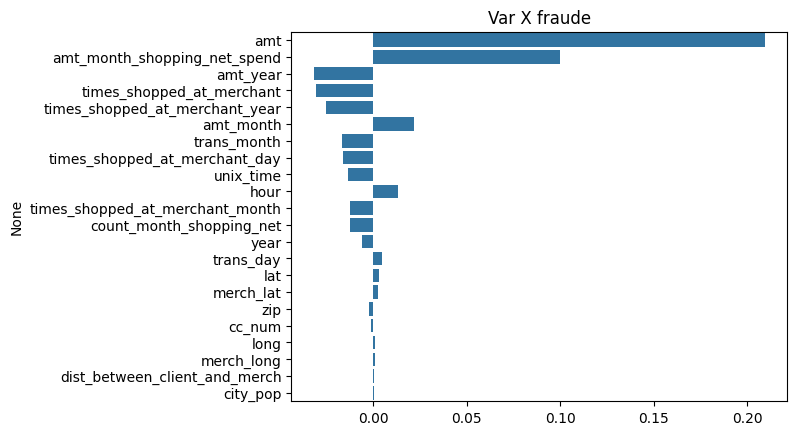

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['is_fraud'])
corr = numeric_cols.corrwith(df['is_fraud']).sort_values(key=abs, ascending=False)

plt.figure()
sns.barplot(x=corr.values, y=corr.index)
plt.title("Var X fraude")
plt.show()

In [5]:
df.reset_index(drop=True, inplace=True)
df = df[
	(df['trans_day'] >= 1) &
	(df['trans_month'] >= 1) &
	(df['trans_month'] <= 12)
].copy()

# Create datetime column
df['timestamp'] = pd.to_datetime({
	'year': df['year'],
	'month': df['trans_month'],
	'day': df['trans_day'],
	'hour': df['hour']
})

# Sort by datetime
df = df.sort_values(by='timestamp').reset_index(drop=True)

# Optional: bring datetime column to the front
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('timestamp')))
df = df[cols]
df.head()

,timestamp,cc_num,merchant,category,amt,first,last,gender,street,city,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2019-01-01,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,True,78.773821,1,1,0,2019,5,4,2,1
1,2019-01-01,36078114201167,fraud_Murray-Smitham,grocery_pos,159.54,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,True,35.921066,1,1,0,2019,4,2,1,2
2,2019-01-01,3567527758368741,fraud_Beier LLC,entertainment,4.01,Amanda,Vance,F,14601 Downs Skyway Apt. 440,Sterling City,...,True,75.991336,1,1,0,2019,3,2,1,1
3,2019-01-01,4026222041577,"fraud_Huel, Hammes and Witting",grocery_pos,195.22,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,True,86.277046,1,1,0,2019,1,1,1,1
4,2019-01-01,341546199006537,"fraud_Bins, Balistreri and Beatty",shopping_pos,268.16,Mark,Brown,M,8580 Moore Cove,Wales,...,True,75.943368,1,1,0,2019,2,1,1,1


In [6]:
entertainment_keywords = ['cinema', 'bar', 'concert', 'club', 'theater', 'entertainment', 'event', 'music', 'party', 'art', 'park', 'museum', 'zoo', 'shopping', 'dining', 'video']

In [7]:
df['is_entertainment'] = df['category'].str.lower().fillna('').apply(
	lambda x: any(keyword in x for keyword in entertainment_keywords)
) | df['merchant'].str.lower().fillna('').apply(
	lambda x: any(keyword in x for keyword in entertainment_keywords)
)

df.head()

,timestamp,cc_num,merchant,category,amt,first,last,gender,street,city,...,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,is_entertainment
0,2019-01-01,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,78.773821,1,1,0,2019,5,4,2,1,False
1,2019-01-01,36078114201167,fraud_Murray-Smitham,grocery_pos,159.54,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,35.921066,1,1,0,2019,4,2,1,2,False
2,2019-01-01,3567527758368741,fraud_Beier LLC,entertainment,4.01,Amanda,Vance,F,14601 Downs Skyway Apt. 440,Sterling City,...,75.991336,1,1,0,2019,3,2,1,1,True
3,2019-01-01,4026222041577,"fraud_Huel, Hammes and Witting",grocery_pos,195.22,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,86.277046,1,1,0,2019,1,1,1,1,False
4,2019-01-01,341546199006537,"fraud_Bins, Balistreri and Beatty",shopping_pos,268.16,Mark,Brown,M,8580 Moore Cove,Wales,...,75.943368,1,1,0,2019,2,1,1,1,True


In [8]:
df['avg_spend_per_visit'] = df['amt_month'] / (df['times_shopped_at_merchant'] + 1)
df['merchant_count'] = df.groupby('cc_num')['merchant'].transform('nunique')
df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 19 or x < 5) else 0)
df['night_percent'] = df.groupby('cc_num')['is_night'].transform('mean')
df['per_month'] = df.groupby(['cc_num','trans_month'])['amt'].transform('var').fillna(0)
df['spend_ratio'] = df['amt'] / (df['amt_month'] + 1)
df['delta_between_transactions'] = df.groupby('cc_num')['timestamp'].diff().fillna(0)
df['out_of_close_range'] = (df['dist_between_client_and_merch'] > 1000).astype(int)
df['7d_rolling_amt'] = df.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df['amt_vs_avg'] = df['amt'] / df.groupby('cc_num')['amt'].transform('mean')
df['price_to_distance'] = df['dist_between_client_and_merch'] * df['amt']

df['night_entertainment'] = ((df['hour'] >= 19) | (df['hour'] <= 5)) & (df['is_entertainment'])

HOLIDAYS = [(1, 1), (2, 14), (10, 31), (11, 24), (12, 25)]
def get_holiday_windows(year):
	windows = []
	for month, day in HOLIDAYS:
		try:
			holiday = datetime.datetime(year, month, day)
			for delta in range(-7, 8):
				windows.append((holiday + datetime.timedelta(days=delta)).date())
		except ValueError:
			continue
	return set(windows)

def is_holiday(row):
	transaction_date = datetime.datetime(row['year'], row['trans_month'], row['trans_day']).date()
	holiday_window = get_holiday_windows(row['year'])
	return int(transaction_date in holiday_window)

df['is_holiday'] = df.apply(is_holiday, axis=1)

holiday_stats = df.groupby(['cc_num', 'is_holiday'])['amt'].mean().unstack(fill_value=0)

df['holiday_spender'] = df['cc_num'].map(
	lambda x: int(holiday_stats.loc[x, 1] > holiday_stats.loc[x, 0]) if x in holiday_stats.index else 0
)
df.head()

,timestamp,cc_num,merchant,category,amt,first,last,gender,street,city,...,per_month,spend_ratio,delta_between_transactions,out_of_close_range,7d_rolling_amt,amt_vs_avg,price_to_distance,night_entertainment,is_holiday,holiday_spender
0,2019-01-01,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,15768.079626,0.832496,0,0,4.97,0.056006,391.505889,False,1,0
1,2019-01-01,36078114201167,fraud_Murray-Smitham,grocery_pos,159.54,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,4506.352539,0.039278,0,0,159.54,2.577281,5730.846863,False,1,1
2,2019-01-01,3567527758368741,fraud_Beier LLC,entertainment,4.01,Amanda,Vance,F,14601 Downs Skyway Apt. 440,Sterling City,...,14205.468703,0.001615,0,0,4.01,0.055771,304.725259,True,1,0
3,2019-01-01,4026222041577,"fraud_Huel, Hammes and Witting",grocery_pos,195.22,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,23150.221760,0.076880,0,0,195.22,2.139835,16843.004857,False,1,1
4,2019-01-01,341546199006537,"fraud_Bins, Balistreri and Beatty",shopping_pos,268.16,Mark,Brown,M,8580 Moore Cove,Wales,...,111358.991449,0.021651,0,0,268.16,4.134283,20364.973502,True,1,1


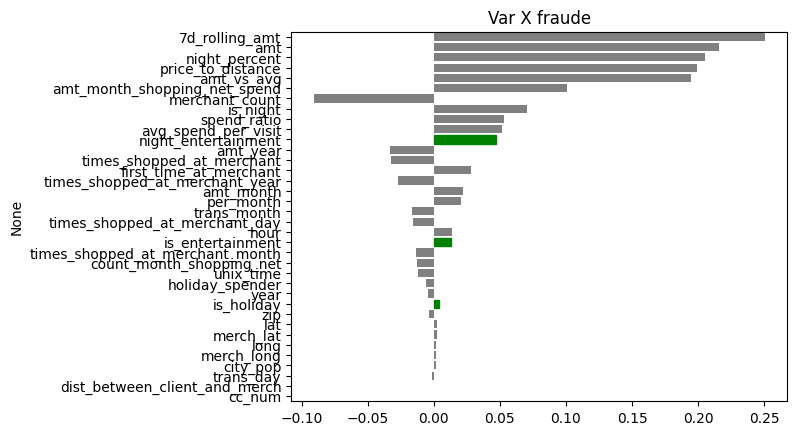

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'bool']).drop(columns=['is_fraud'])
corr = numeric_cols.corrwith(df['is_fraud']).sort_values(key=abs, ascending=False)

plt.figure()
barplot = sns.barplot(x=corr.values, y=corr.index, color='gray')
for i, label in enumerate(corr.index):
	if label in ['is_entertainment', 'is_holiday', 'night_entertainment']:
		barplot.patches[i].set_color('green')
plt.title("Var X fraude")
plt.show()

In [10]:
df.to_csv("engineered_dataset.csv", index=None)